# Load Dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\Abirami\Downloads\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

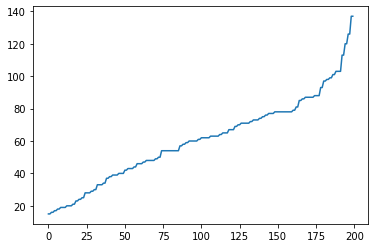

In [3]:
plt.plot(df['Annual Income (k$)'])
plt.show()

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

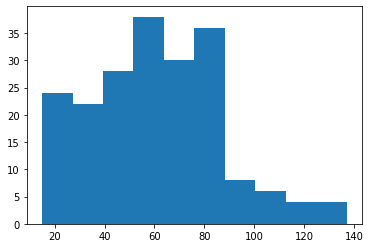

In [4]:
plt.hist(df['Annual Income (k$)'])

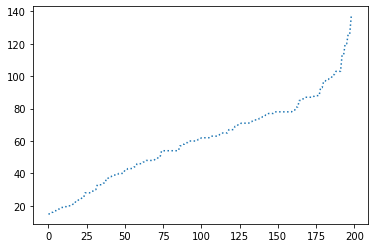

In [5]:
data=np.array(df['Annual Income (k$)'])
plt.plot(data,linestyle = 'dotted')

<AxesSubplot:>

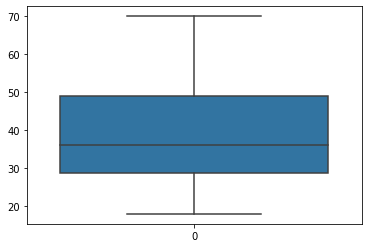

In [6]:
sns.boxplot(df['Age'])

<AxesSubplot:ylabel='count'>

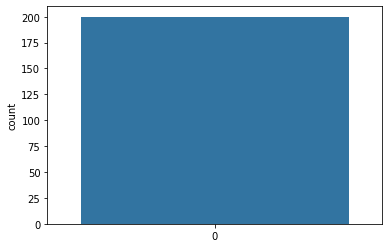

In [7]:
sns.countplot(df['Age'])

<AxesSubplot:ylabel='Density'>

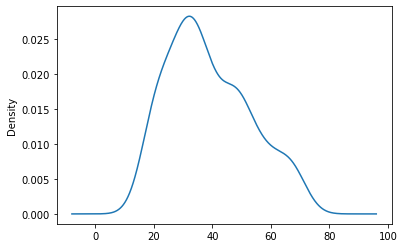

In [9]:
df['Age'].plot(kind='density')

# Bivariate Analysis Visualization

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

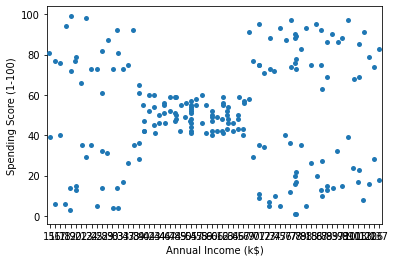

In [10]:
sns.stripplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

Text(0, 0.5, 'Age')

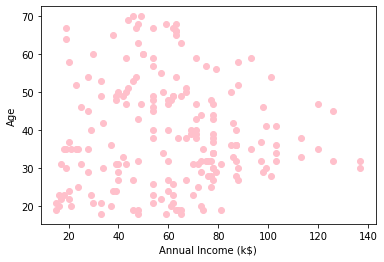

In [11]:
plt.scatter(df['Annual Income (k$)'],df['Age'],color='pink')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

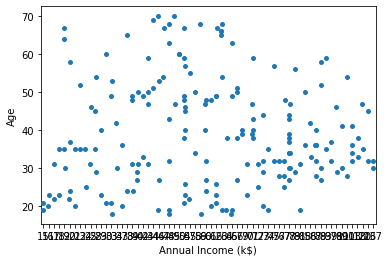

In [12]:
sns.stripplot(x=df['Annual Income (k$)'],y=df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

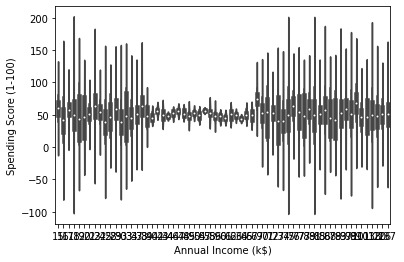

In [13]:
sns.violinplot(x ='Annual Income (k$)', y ='Spending Score (1-100)', data = df)

# Multivariate Analysis Visualization

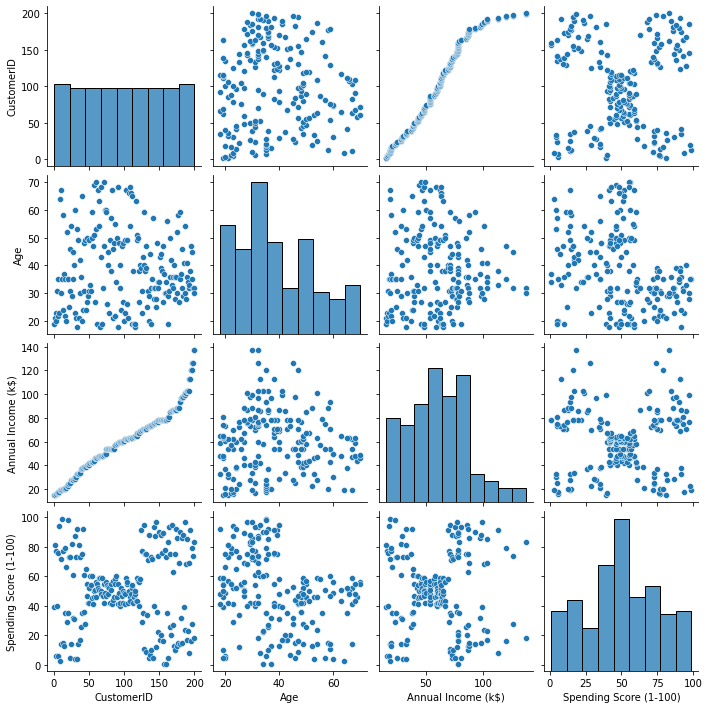

In [14]:
sns.pairplot(df)

<AxesSubplot:>

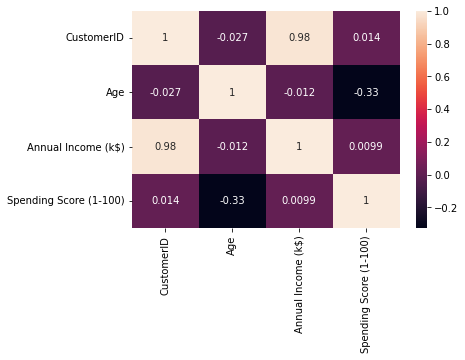

In [15]:
sns.heatmap(df.corr(),annot=True)

# Descriptive Statistics

In [16]:
df.shape

(200, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.mean()

C:\Users\Abirami\AppData\Local\Temp\ipykernel_30656\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [21]:
df['Age'].mean()

38.85

In [22]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [23]:
df.median()

C:\Users\Abirami\AppData\Local\Temp\ipykernel_30656\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [24]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# Handle Missing Values

In [25]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Handling Outliers

<AxesSubplot:>

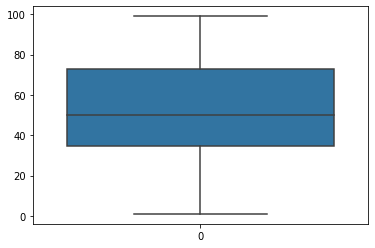

In [26]:
sns.boxplot(df['Spending Score (1-100)'])

In [27]:
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Spending Score (1-100)']=np.where(df['Spending Score (1-100)']>upper_whisker,upper_whisker,np.where(df['Spending Score (1-100)']<lower_whisker,lower_whisker,df['Spending Score (1-100)']))

<AxesSubplot:>

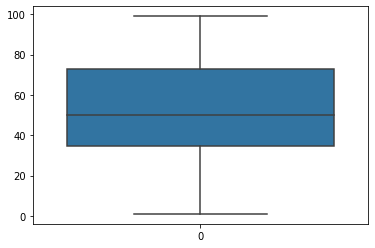

In [28]:
sns.boxplot(df['Spending Score (1-100)'])

# Categorical Variable and Encoding

In [29]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [30]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [31]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [33]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39.0
1,2,1,21,15,81.0
2,3,0,20,16,6.0
3,4,0,23,16,77.0
4,5,0,31,17,40.0


# Independent and Dependent Variables

In [35]:
X = df.drop("Spending Score (1-100)",axis=1)
Y = df['Spending Score (1-100)']

In [36]:
X[:5]

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [37]:
Y[:5]

0    39.0
1    81.0
2     6.0
3    77.0
4    40.0
Name: Spending Score (1-100), dtype: float64

# Scale Independent Variables

In [38]:
X

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17
...,...,...,...,...
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137


In [39]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.42456879 -1.73899919]
 [-1.70609137  1.12815215 -1.28103541 -1.73899919]
 [-1.68877065 -0.88640526 -1.3528021  -1.70082976]
 [-1.67144992 -0.88640526 -1.13750203 -1.70082976]
 [-1.6541292  -0.88640526 -0.56336851 -1.66266033]
 [-1.63680847 -0.88640526 -1.20926872 -1.66266033]
 [-1.61948775 -0.88640526 -0.27630176 -1.62449091]
 [-1.60216702 -0.88640526 -1.13750203 -1.62449091]
 [-1.5848463   1.12815215  1.80493225 -1.58632148]
 [-1.56752558 -0.88640526 -0.6351352  -1.58632148]
 [-1.55020485  1.12815215  2.02023231 -1.58632148]
 [-1.53288413 -0.88640526 -0.27630176 -1.58632148]
 [-1.5155634  -0.88640526  1.37433211 -1.54815205]
 [-1.49824268 -0.88640526 -1.06573534 -1.54815205]
 [-1.48092195  1.12815215 -0.13276838 -1.54815205]
 [-1.46360123  1.12815215 -1.20926872 -1.54815205]
 [-1.4462805  -0.88640526 -0.27630176 -1.50998262]
 [-1.42895978  1.12815215 -1.3528021  -1.50998262]
 [-1.41163905  1.12815215  0.94373197 -1.43364376]
 [-1.39431833 -0.88640526 -0.27

In [40]:
X_scaled=pd.DataFrame(scale,columns=X.columns)
X_scaled

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.738999
1,-1.706091,1.128152,-1.281035,-1.738999
2,-1.688771,-0.886405,-1.352802,-1.700830
3,-1.671450,-0.886405,-1.137502,-1.700830
4,-1.654129,-0.886405,-0.563369,-1.662660
...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791
196,1.671450,-0.886405,0.441365,2.497807
197,1.688771,1.128152,-0.491602,2.497807
198,1.706091,1.128152,-0.491602,2.917671


# KMeans Clustering Algorithm 

# Train and Test Split

In [41]:
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)
X_train.shape

(160, 4)

In [42]:
X_test.shape

(40, 4)

In [43]:
Y_train.shape

(160,)

In [44]:
Y_test.shape

(40,)

# Build the Model

In [45]:
x = df.iloc[:,[3,4]].values

In [46]:
#training the K-means model on a dataset  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

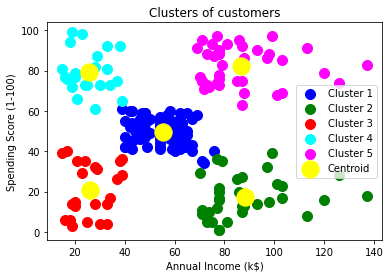

In [49]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()